In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

## Loading Information

Companies House info can be found at:

http://download.companieshouse.gov.uk/en_output.html

Should give us an idea of how many companies there are in any given area plus some information on mortgages etc.

In [2]:
pd.read_csv('/home/alessandro/Documents/placemake/BasicCompanyData-2017-03-06-part1_5.csv', nrows=10, thousands=',')

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LTD,08209948,NaN,NaN,METROHOUSE 57 PEPPER ROAD,HUNSLET,LEEDS,YORKSHIRE,NaN,LS10 2RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/09/2017,11/09/2016
1,!BIG IMPACT GRAPHICS LIMITED,07382019,NaN,NaN,335 ROSDEN HOUSE,372 OLD STREET,LONDON,NaN,NaN,EC1V 9AV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/10/2017,21/09/2016
2,!NFERNO LTD.,04753368,NaN,NaN,FIRST FLOOR THAVIES INN HOUSE 3-4,HOLBORN CIRCUS,LONDON,NaN,NaN,EC1N 2HA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/05/2018,NaN
3,!NSPIRED LTD,SC421617,NaN,NaN,26 POLMUIR ROAD,NaN,ABERDEEN,NaN,UNITED KINGDOM,AB11 7SY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/04/2018,NaN
4,!NVERTD DESIGNS LIMITED,09152972,NaN,NaN,32 RECTORY ROAD,NaN,STEPPINGLEY,NaN,NaN,MK45 5AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/08/2018,30/07/2016
5,!OBAC LIMITED,FC031362,NaN,NaN,1ST AND 2ND FLOORS ELIZABETH HOUSE,LES RUETIES BRAYES,ST PETER PORT,GUERNSEY,GUERNSEY,GY1 1EW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/12/2017,NaN
6,!OBAC UK LIMITED,07687209,NaN,NaN,ENDEAVOUR HOUSE,COOPERS END ROAD,STANSTED AIRPORT,NaN,NaN,CM24 1SJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/07/2018,NaN
7,!YOZO FASS LIMITED,02714021,NaN,NaN,1 VERONICA HOUSE,WICKHAM ROAD,BROCKLEY,NaN,NaN,SE4 1NQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2018,NaN
8,""" AS WE DO "" "" AS I DO "" LIMITED",10121672,NaN,NaN,59A CRICKETFIELD ROAD,NaN,LONDON,NaN,ENGLAND,E5 8NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/04/2018,NaN
9,""" BROOK VIEW ""MECHANICAL AND ELECTRICAL ENGINE...",10275228,NaN,NaN,33 BROOKLANDS ROAD,NaN,HAVANT,HAMPSHIRE,UNITED KINGDOM,PO9 3NT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/07/2018,NaN


Already from the first 10 rows can see that RegAddress.PostTown will not be much help. Will need to run through the csv looking for matches with constituent postcodes in London.

Luckily we can just look at the intersection of the postcodes with those present in the BBA SME outstanding loans list, which has all the postcodes conveniently present. This dataset may be found here as a .xlxs:

https://www.bba.org.uk/news/statistics/postcode-lending/

And unlike the CML has just SME lending included in it. I downloaded the relevant sheet as a .csv

In [3]:
pd.read_csv('/home/alessandro/Documents/placemake/BBA_Lending_Postcodes_SME_Q2_2016_Aggregate.csv', nrows=10, thousands=',')

,Value of SME lending outstanding in Great Britain split by sector postcode,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Click +/- buttons to expand and contract areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Or click here to return to postcode search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,"Value of lending, £",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Region,Area,Area name,Sector,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
7,East Midlands,DE,Derby,DE1 0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
8,East Midlands,DE,Derby,DE1 1,"30,678,044","31,941,942","30,875,650","28,535,801","35,638,311","14,743,433","34,319,197","33,308,407","30,946,215","31,049,959","14,937,403","14,155,142","13,764,396"
9,East Midlands,DE,Derby,DE1 2,"19,055,516","19,126,449","18,546,910","19,135,408","19,906,623","19,953,442","19,108,609","18,809,591","9,708,197","10,899,052","10,686,245","9,504,525","9,168,535"


In [4]:
pd.read_csv('/home/alessandro/Documents/placemake/BBA_Lending_Postcodes_SME_Q2_2016_Aggregate.csv', skiprows=7, nrows=10)

,Region,Area,Area name,Sector,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
0,East Midlands,DE,Derby,DE1 0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,East Midlands,DE,Derby,DE1 1,"30,678,044","31,941,942","30,875,650","28,535,801","35,638,311","14,743,433","34,319,197","33,308,407","30,946,215","31,049,959","14,937,403","14,155,142","13,764,396"
2,East Midlands,DE,Derby,DE1 2,"19,055,516","19,126,449","18,546,910","19,135,408","19,906,623","19,953,442","19,108,609","18,809,591","9,708,197","10,899,052","10,686,245","9,504,525","9,168,535"
3,East Midlands,DE,Derby,DE1 3,"10,166,216","9,577,575","9,859,996","11,747,153","11,395,873","11,471,277","11,218,739","11,137,606","11,390,717","11,838,512","9,415,937","8,793,372","10,214,770"
4,East Midlands,DE,Derby,DE1 9,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
5,East Midlands,DE,Derby,DE11 0,"3,034,351","3,072,341","3,094,076","3,136,959","2,899,193","2,865,356","2,918,120","2,951,126","2,892,421","2,845,157","3,372,677","3,416,646","3,632,261"
6,East Midlands,DE,Derby,DE11 1,NaN,NaN,NaN,NaN,Nil,Nil,NIL,NIL,NIL,NIL,NIL,NIL,NIL
7,East Midlands,DE,Derby,DE11 7,"4,555,326","4,587,829","4,431,959","4,926,524","5,290,086","5,140,231","5,050,944","5,088,981","5,061,374","3,994,383","5,056,454","4,712,141","4,492,653"
8,East Midlands,DE,Derby,DE11 8,"4,487,690","4,860,022","5,055,222","4,962,346","4,904,518","5,040,797","4,491,673","4,709,473","5,521,513","5,606,669","6,260,236","6,817,758","6,900,843"
9,East Midlands,DE,Derby,DE11 9,"7,557,813","7,370,591","8,187,187","7,738,833","8,235,877","7,757,450","7,429,317","10,199,827","11,491,716","10,544,460","10,652,014","10,369,557","9,484,336"


In [5]:
bba = pd.read_csv('/home/alessandro/Documents/placemake/BBA_Lending_Postcodes_SME_Q2_2016_Aggregate.csv', skiprows=7)

In [6]:
bba = bba[bba['Region']=='London']

Now let's extract the district postcodes noting that the Sector is simply the district postcode plus a number. While we're at it, we might as well get rid of anything ending in 'Other' or 'total', or simply all Sectors not ending in a number.

In [7]:
bba = bba.reset_index(drop=True)

In [8]:
bba = bba[(bba['Sector'].str.contains("Other")==False) & (bba['Sector'].str.contains("Total")==False) ]

In [9]:
bba.tail(5)

,Region,Area,Area name,Sector,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
1598,London,WD,Watford,WD7 0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1599,London,WD,Watford,WD7 7,"33,501,238","34,403,783","34,641,705","33,968,811","37,192,240","37,451,990","36,081,831","36,238,968","35,529,649","34,492,274","36,634,187","36,776,994","39,786,463"
1600,London,WD,Watford,WD7 8,"10,000,167","9,058,626","9,653,441","11,394,044","10,892,063","10,022,137","7,601,386","9,371,917","9,131,168","9,816,562","10,975,589","11,803,340","12,361,721"
1601,London,WD,Watford,WD7 9,"1,159,521","1,409,338","1,180,968","1,279,482","1,208,542","1,157,659","1,100,030","4,675,430","4,632,726","4,554,481","3,086,359","2,788,294","2,550,008"
1602,London,WD,Watford,WD99 1,NaN,NaN,NaN,NaN,Nil,Nil,NIL,NIL,NIL,NIL,NIL,NIL,NIL


In [10]:
bba = bba.reset_index(drop=True)

In [11]:
bba['District'] = bba['Sector']

In [12]:
bba['District'] = bba.District.str[:-2]

district = bba['District']
bba.drop(labels=['District'], axis=1,inplace = True)
bba.insert(4, 'District', district)

In [13]:
bba.District[1]

'BR1'

Now we have all the starting steps to get anything we need and do something interesting with the data.

## A Simple Index

The simplest normalised index is just the total amount lent to SMEs that is outstanding per district, normalised either by max or by zscore. Let's have a look at the numbers.

In [14]:
for i in range(5, bba.shape[1]):
    bba[bba.columns[i]] = pd.to_numeric(bba[bba.columns[i]].str.replace(",",""), coerce)

In [15]:
bba.head()

,Region,Area,Area name,Sector,District,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
0,London,BR,Bromley,BR1 1,BR1,18066201.0,17222782.0,13234071.0,10683126.0,10127487.0,8967105.0,8722988.0,10361335.0,8460156.0,6619790.0,6619016.0,7004973.0,7389837.0
1,London,BR,Bromley,BR1 2,BR1,31568825.0,31471672.0,30844497.0,30662764.0,27481968.0,19521347.0,26497631.0,20095665.0,19892784.0,31357619.0,30270936.0,28148747.0,28610978.0
2,London,BR,Bromley,BR1 3,BR1,13245652.0,17022664.0,14451884.0,22335410.0,21806968.0,21183923.0,19890846.0,18433431.0,19525142.0,19708506.0,20584263.0,15830570.0,17129790.0
3,London,BR,Bromley,BR1 4,BR1,39840028.0,28654647.0,24607605.0,22673369.0,22172313.0,25317514.0,30710920.0,30317686.0,28728353.0,28981875.0,32656255.0,31921277.0,32410645.0
4,London,BR,Bromley,BR1 5,BR1,5861610.0,5619861.0,5507874.0,5421504.0,5186999.0,4745274.0,4664795.0,4989375.0,4823490.0,4782893.0,5110388.0,5184811.0,4874216.0


In [16]:
data = bba[bba.columns[5:]]

In [17]:
data = data.groupby(bba.District).sum()

In [18]:
data = data.dropna()

In [19]:
zscore = (data - data.mean(axis=0))/data.std(axis=0)

In [20]:
zscore.head()

,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
District,,,,,,,,,,,,,
BR1,1.244964,1.039710,0.824159,0.839186,0.734473,0.588633,0.840651,0.706957,0.668066,0.844716,0.997473,0.849832,0.841620
BR2,0.311343,0.302701,0.331594,0.200277,0.241538,0.238568,0.356119,0.314968,0.276419,0.163882,0.226083,0.240895,0.276332
BR3,0.409754,0.407858,0.432840,0.242343,0.191230,0.133387,0.154786,0.155611,0.190810,0.183551,0.303079,0.255434,0.268917
BR4,-0.705122,-0.702869,-0.674856,-0.657217,-0.681282,-0.689823,-0.638248,-0.671135,-0.661029,-0.647231,-0.605643,-0.609067,-0.611623
BR5,-0.581957,-0.573570,-0.583383,-0.538886,-0.610879,-0.577220,-0.547310,-0.522188,-0.536069,-0.557537,-0.469416,-0.417542,-0.412379


In [21]:
zscore = zscore.reset_index()

In [22]:
zscore.head()

,District,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
0,BR1,1.244964,1.039710,0.824159,0.839186,0.734473,0.588633,0.840651,0.706957,0.668066,0.844716,0.997473,0.849832,0.841620
1,BR2,0.311343,0.302701,0.331594,0.200277,0.241538,0.238568,0.356119,0.314968,0.276419,0.163882,0.226083,0.240895,0.276332
2,BR3,0.409754,0.407858,0.432840,0.242343,0.191230,0.133387,0.154786,0.155611,0.190810,0.183551,0.303079,0.255434,0.268917
3,BR4,-0.705122,-0.702869,-0.674856,-0.657217,-0.681282,-0.689823,-0.638248,-0.671135,-0.661029,-0.647231,-0.605643,-0.609067,-0.611623
4,BR5,-0.581957,-0.573570,-0.583383,-0.538886,-0.610879,-0.577220,-0.547310,-0.522188,-0.536069,-0.557537,-0.469416,-0.417542,-0.412379


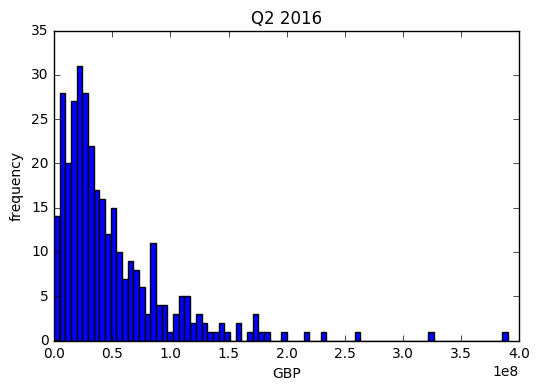

In [23]:
plt.hist(data['Q2 2016'], bins=80)
plt.title('Q2 2016')
plt.xlabel('GBP')
plt.ylabel('frequency')

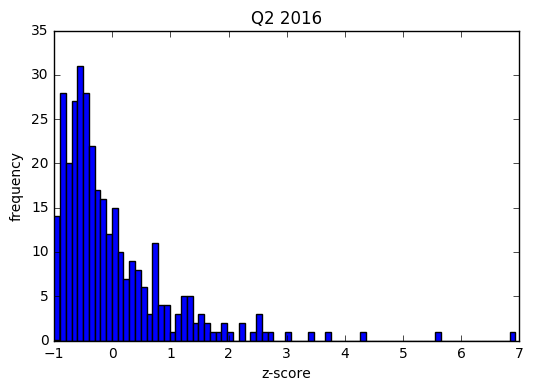

In [24]:
plt.hist(zscore['Q2 2016'], bins=80)
plt.title('Q2 2016')
plt.xlabel('z-score')
plt.ylabel('frequency')

Interestingly we have a strong skew here, with a few districts that are significantly more exposed than others in terms of mortgage loans, in Q2 2016.

In [25]:
zscore[zscore['Q2 2016']>3]['District']

150     N16
166    NW10
167    NW11
169     NW3
196     SE1
293     W1G
Name: District, dtype: object

In [26]:
zscore[zscore['Q2 2016']<-0.97]['District']

43     EC2V
67     GU17
241    SW1E
276    UB11
309    WC1A
318    WC2E
Name: District, dtype: object

We could then ask whether this is a novelty or has been happening since 2013

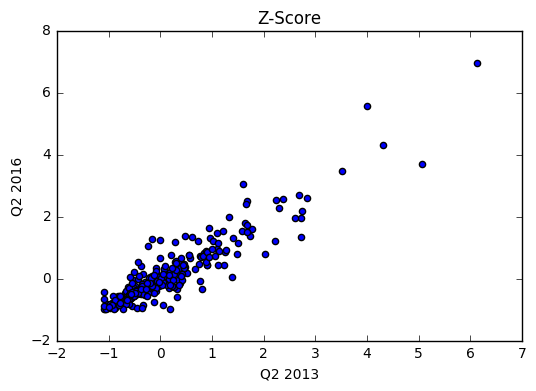

In [27]:
fig, ax = plt.subplots()
x = zscore['Q2 2013']
y = zscore['Q2 2016']
ax.scatter(x,y)
plt.xlabel('Q2 2013')
plt.ylabel('Q2 2016')
plt.title('Z-Score')

In [28]:
zscore[1:].corr()

,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
Q2 2013,1.000000,0.987752,0.978979,0.973255,0.970143,0.965946,0.927055,0.953161,0.939637,0.935328,0.933422,0.922516,0.928842
Q3 2013,0.987752,1.000000,0.979914,0.977787,0.968953,0.964842,0.925160,0.957113,0.942114,0.941013,0.935702,0.925538,0.932725
Q4 2013,0.978979,0.979914,1.000000,0.989840,0.983547,0.978833,0.949098,0.962251,0.953489,0.947558,0.944860,0.935723,0.940427
Q1 2014,0.973255,0.977787,0.989840,1.000000,0.986831,0.982098,0.947010,0.959922,0.945035,0.940439,0.938361,0.926724,0.935885
Q2 2014,0.970143,0.968953,0.983547,0.986831,1.000000,0.992128,0.955006,0.968412,0.958494,0.952451,0.948066,0.941013,0.945864
Q3 2014,0.965946,0.964842,0.978833,0.982098,0.992128,1.000000,0.956189,0.970236,0.961504,0.954550,0.951136,0.941997,0.949712
Q4 2014,0.927055,0.925160,0.949098,0.947010,0.955006,0.956189,1.000000,0.956599,0.952107,0.942487,0.941146,0.933978,0.936545
Q1 2015,0.953161,0.957113,0.962251,0.959922,0.968412,0.970236,0.956599,1.000000,0.983827,0.981640,0.976160,0.971980,0.972682
Q2 2015,0.939637,0.942114,0.953489,0.945035,0.958494,0.961504,0.952107,0.983827,1.000000,0.987969,0.979595,0.972415,0.968877
Q3 2015,0.935328,0.941013,0.947558,0.940439,0.952451,0.954550,0.942487,0.981640,0.987969,1.000000,0.985980,0.979947,0.975901


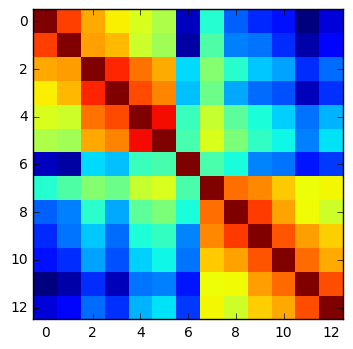

In [29]:
plt.imshow(zscore[1:].corr(), interpolation="none")

The correlation matrix also shows that the most exposed districts have been very much the same since 2013.

Let's look instead at how the mortgage size has varied for some interesting cases, eg N16

In [30]:
df = data.T

In [31]:
df.head()

District,BR1,BR2,BR3,BR4,BR5,BR6,BR7,BR8,CR0,CR2,...,WD18,WD19,WD23,WD24,WD25,WD3,WD4,WD5,WD6,WD7
Q2 2013,108582316.0,65123979.0,69704838.0,17809465.0,23542568.0,90004101.0,45196373.0,10901289.0,183107407.0,54131756.0,...,76222161.0,7117163.0,37562962.0,59729803.0,52870688.0,102970525.0,20364267.0,4534736.0,69362416.0,44660926.0
Q3 2013,99991626.0,65044382.0,70030694.0,17362557.0,23493660.0,87543837.0,44133465.0,10295337.0,166284872.0,55278462.0,...,84626906.0,7706459.0,38797993.0,45419276.0,51686475.0,105592020.0,18037828.0,4599801.0,64170156.0,44871747.0
Q4 2013,88645931.0,65560307.0,70305503.0,18389727.0,22676890.0,87609770.0,47365852.0,8752476.0,162490963.0,53258402.0,...,81997362.0,7070958.0,36529524.0,39595239.0,51605499.0,107818863.0,14867564.0,4699497.0,66148151.0,45476114.0
Q1 2014,91776173.0,60503244.0,62562270.0,18531194.0,24323186.0,85427986.0,47088880.0,8833223.0,168161121.0,55146596.0,...,85637504.0,8037745.0,36456118.0,42181220.0,53130961.0,111943787.0,15174041.0,4594300.0,65998554.0,46642337.0
Q2 2014,86775735.0,62656879.0,60195378.0,17504199.0,20948956.0,85777431.0,40706742.0,8483062.0,166014476.0,56940213.0,...,82356569.0,7874214.0,26766892.0,39749245.0,54256460.0,107898445.0,14414924.0,4512699.0,74805495.0,49292845.0


In [32]:
t = df.index
df = df.reset_index(drop=True)

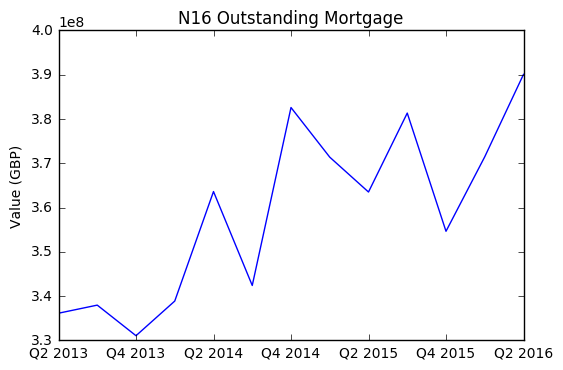

In [33]:
fig, ax = plt.subplots()
ax.plot(df['N16'])
plt.title('N16 Outstanding Mortgage')
plt.ylabel('Value (GBP)')
ax.set_xticklabels(t[::2])

Can also look at term-on-term percentage change in any given district.

In [34]:
prcnt = (data.pct_change(axis=1).round(2)*100).fillna(0).astype(str).add('%')

In [35]:
prcnt.head()

,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
District,,,,,,,,,,,,,
BR1,0.0%,-8.0%,-11.0%,4.0%,-5.0%,-8.0%,13.0%,-7.0%,-3.0%,12.0%,4.0%,-8.0%,3.0%
BR2,0.0%,-0.0%,1.0%,-8.0%,4.0%,-0.0%,7.0%,-3.0%,-4.0%,-7.0%,1.0%,1.0%,6.0%
BR3,0.0%,0.0%,0.0%,-11.0%,-4.0%,-5.0%,0.0%,1.0%,2.0%,1.0%,6.0%,-4.0%,4.0%
BR4,0.0%,-3.0%,6.0%,1.0%,-6.0%,-6.0%,14.0%,-7.0%,2.0%,3.0%,6.0%,-2.0%,-1.0%
BR5,0.0%,-0.0%,-3.0%,7.0%,-14.0%,5.0%,5.0%,7.0%,-3.0%,-4.0%,14.0%,8.0%,2.0%


In [36]:
prcnt[prcnt.index=='N16']

,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
District,,,,,,,,,,,,,
N16,0.0%,1.0%,-2.0%,2.0%,7.0%,-6.0%,12.0%,-3.0%,-2.0%,5.0%,-7.0%,5.0%,5.0%


Perhaps more interesting is year-on-year changes (Q2-2016 vs Q2-2015)

In [37]:
yoy_p = data['Q2 2016']/data['Q2 2015'] - 1
yoy = data['Q2 2016']-data['Q2 2015'] 

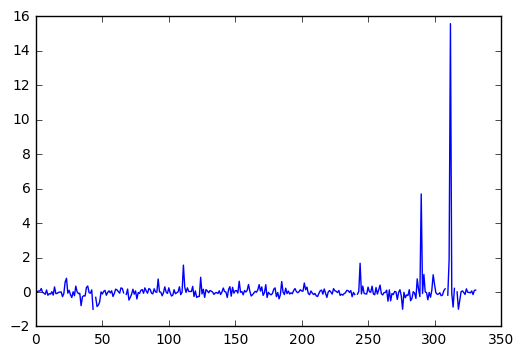

In [38]:
plt.plot(yoy_p.values)

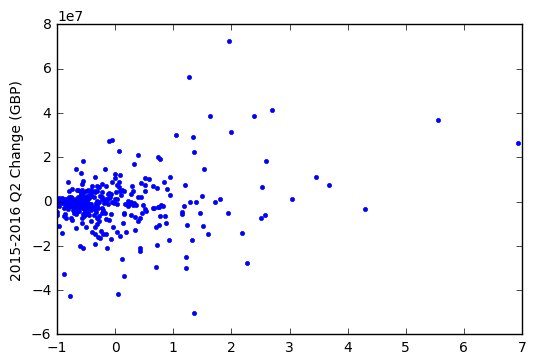

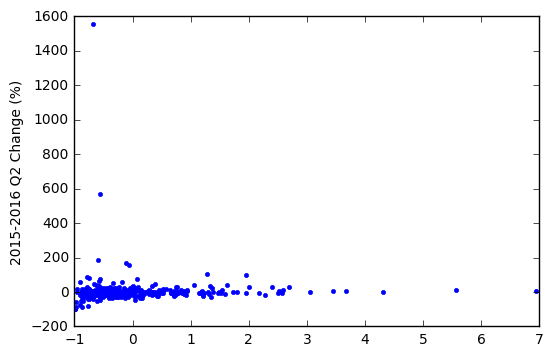

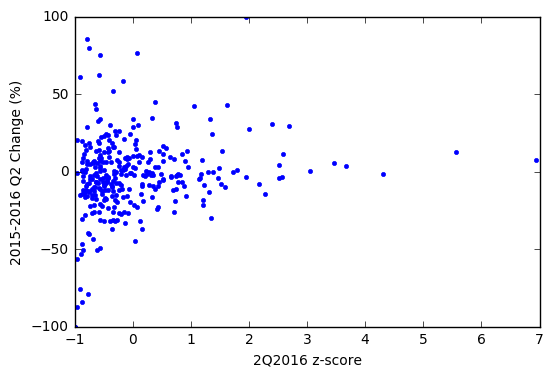

In [39]:
plt.plot(zscore['Q2 2016'], yoy, '.')
plt.ylabel('2015-2016 Q2 Change (GBP)')
plt.show()
plt.plot(zscore['Q2 2016'], yoy_p*100, '.')
plt.ylabel('2015-2016 Q2 Change (%)')
plt.show()
plt.plot(zscore['Q2 2016'], yoy_p*100, '.')
plt.xlabel('2Q2016 z-score')
plt.ylabel('2015-2016 Q2 Change (%)')
plt.ylim([-100,100])
plt.show()

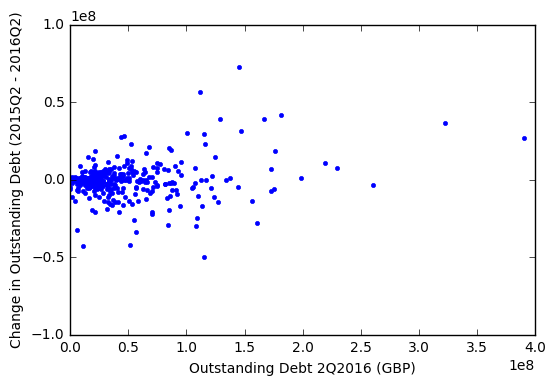

In [40]:
plt.plot(data['Q2 2016'], yoy, '.')
plt.ylabel('Change in Outstanding Debt (2015Q2 - 2016Q2)')
plt.xlabel('Outstanding Debt 2Q2016 (GBP)')
plt.ylim([-10e7, 10e7])
plt.show()

These graphs give an idea of where the most movement has been in the last year. In particular, most of the districts in the £1.0M-£1.5M bracket seem to have acquired the majority of this debt in this last period.

## Back to Companies House

Have "district" with the list of all districts in London, so can quickly parse through the Companies House data to compile a list of London-based companies.

In [41]:
district = district.unique()

The following was a good attempt to parse, but way too slow:

```
import itertools as IT
import pandas as pd

iter_csv = pd.read_csv('/home/alessandro/Documents/placemake/BasicCompanyData-2017-03-06-part1_5.csv', iterator=True, chunksize=1000)
companies = pd.concat(chunk.ix[[any(distr in str(chunk.ix[i,9]) for distr in district) for i in chunk.index],:] for chunk in iter_csv)

```

The following works much faster:

```
iter_csv = pd.read_csv('/home/alessandro/Documents/placemake/BasicCompanyData-2017-03-06-part1_5.csv', iterator=True, chunksize=10000)

companies = pd.concat(chunk.ix[(chunk['RegAddress.PostCode'].str.match('|'.join(district))==True)&(chunk['Mortgages.NumMortOutstanding']>0),:] for chunk in iter_csv)
```

However, this is not an efficient way of parsing through the data, especially since we don't need the majority of it. Instead, could try and summarise everything by postcode

In [42]:
iter_csv = pd.read_csv('/home/alessandro/Documents/placemake/BasicCompanyData-2017-03-06-part1_5.csv', iterator=True, chunksize=10000)

companies = iter_csv.get_chunk(100)

In [43]:
companies.head(5)

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LTD,08209948,NaN,NaN,METROHOUSE 57 PEPPER ROAD,HUNSLET,LEEDS,YORKSHIRE,NaN,LS10 2RU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/09/2017,11/09/2016
1,!BIG IMPACT GRAPHICS LIMITED,07382019,NaN,NaN,335 ROSDEN HOUSE,372 OLD STREET,LONDON,NaN,NaN,EC1V 9AV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/10/2017,21/09/2016
2,!NFERNO LTD.,04753368,NaN,NaN,FIRST FLOOR THAVIES INN HOUSE 3-4,HOLBORN CIRCUS,LONDON,NaN,NaN,EC1N 2HA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/05/2018,NaN
3,!NSPIRED LTD,SC421617,NaN,NaN,26 POLMUIR ROAD,NaN,ABERDEEN,NaN,UNITED KINGDOM,AB11 7SY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/04/2018,NaN
4,!NVERTD DESIGNS LIMITED,09152972,NaN,NaN,32 RECTORY ROAD,NaN,STEPPINGLEY,NaN,NaN,MK45 5AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/08/2018,30/07/2016


In [44]:
np.unique(companies['CompanyStatus'])

array(['Active', 'Active - Proposal to Strike off', 'Liquidation'], dtype=object)

In [45]:
ch_districts = pd.DataFrame(columns = district, index=['num', 'active', 'mor_num_charges', 'mor_num_outstanding', 'mor_part_sat', 'mor_sat'], data = 0)

In [46]:
ch_districts

,BR1,BR2,BR3,BR4,BR5,BR6,BR7,BR8,CR0,CR2,...,WD19,WD23,WD24,WD25,WD3,WD4,WD5,WD6,WD7,WD99
num,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
active,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mor_num_charges,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mor_num_outstanding,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mor_part_sat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mor_sat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
import csv

filename = '/home/alessandro/Documents/placemake/BasicCompanyDataAsOneFile-2017-03-06.csv'



len_d = len(district)
with open(filename, 'r') as f:
    reader = csv.DictReader(f)
    for i, line in enumerate(reader):
        d = False
        for distr in district:
            if line['RegAddress.PostCode'][:-4] == distr:
                d = True
                break
        if d:
            ch_districts[distr]['num'] += 1
            if line['CompanyStatus'] == 'Active':
                ch_districts[distr]['active'] += 1
            ch_districts[distr]['mor_num_charges'] += int(line['Mortgages.NumMortCharges'])
            ch_districts[distr]['mor_num_outstanding'] += int(line['Mortgages.NumMortOutstanding'])
            ch_districts[distr]['mor_part_sat'] += int(line['Mortgages.NumMortPartSatisfied'])
            ch_districts[distr]['mor_sat'] += int(line['Mortgages.NumMortSatisfied'])
        

In [48]:
ch_districts.to_pickle('/home/alessandro/Documents/placemake/CompaniesHouseDataByDistrict.pkl')

In [49]:
ch_districts

,BR1,BR2,BR3,BR4,BR5,BR6,BR7,BR8,CR0,CR2,...,WD19,WD23,WD24,WD25,WD3,WD4,WD5,WD6,WD7,WD99
num,4627,3506,4348,1246,2398,3338,1293,2132,15456,3144,...,1127,1824,2642,1296,4959,997,442,6767,1308,0
active,4422,3346,4063,1199,2308,3180,1244,2059,14699,2804,...,1090,1639,2494,1252,4726,970,425,6232,1275,0
mor_num_charges,1946,1012,1798,385,550,1250,525,1097,5480,960,...,193,901,1485,658,2732,649,81,4584,820,0
mor_num_outstanding,1042,586,1109,314,370,709,301,784,3330,678,...,96,515,642,348,1606,332,47,2350,599,0
mor_part_sat,0,4,4,0,0,0,0,0,3,0,...,0,1,0,0,2,0,0,2,2,0
mor_sat,904,422,685,71,180,541,224,312,2146,278,...,97,384,839,310,1124,317,34,2232,219,0


In [50]:
ch_bba = ch_districts.T.join(data, how='inner')

In [51]:
ch_bba

,num,active,mor_num_charges,mor_num_outstanding,mor_part_sat,mor_sat,Q2 2013,Q3 2013,Q4 2013,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
BR1,4627,4422,1946,1042,0,904,108582316.0,99991626.0,88645931.0,91776173.0,86775735.0,79735163.0,90487180.0,84197492.0,81429925.0,91450683.0,95240858.0,88090378.0,90415466.0
BR2,3506,3346,1012,586,4,422,65123979.0,65044382.0,65560307.0,60503244.0,62656879.0,62414574.0,66990719.0,65239525.0,62731848.0,58150891.0,58856640.0,59343032.0,62623398.0
BR3,4348,4063,1798,1109,4,685,69704838.0,70030694.0,70305503.0,62562270.0,60195378.0,57210399.0,57227422.0,57532482.0,58644708.0,59112943.0,62488346.0,60029396.0,62258842.0
BR4,1246,1199,385,314,0,71,17809465.0,17362557.0,18389727.0,18531194.0,17504199.0,16479485.0,18770677.0,17548197.0,17976075.0,18479164.0,19626577.0,19217159.0,18967605.0
BR5,2398,2308,550,370,0,180,23542568.0,23493660.0,22676890.0,24323186.0,20948956.0,22050858.0,23180573.0,24751777.0,23941932.0,22866123.0,26052030.0,28258860.0,28763336.0
BR6,3338,3180,1250,709,0,541,90004101.0,87543837.0,87609770.0,85427986.0,85777431.0,83991384.0,83019395.0,82493914.0,91460145.0,93296549.0,83273289.0,88311577.0,89427408.0
BR7,1293,1244,525,301,0,224,45196373.0,44133465.0,47365852.0,47088880.0,40706742.0,37891794.0,38106315.0,37700474.0,29674043.0,30325820.0,30553677.0,31814033.0,27746163.0
BR8,2132,2059,1097,784,0,312,10901289.0,10295337.0,8752476.0,8833223.0,8483062.0,7961591.0,18785983.0,18201302.0,13710154.0,14556751.0,14061759.0,13832216.0,11869669.0
CR0,15456,14699,5480,3330,3,2146,183107407.0,166284872.0,162490963.0,168161121.0,166014476.0,172465490.0,173587335.0,167063269.0,157954614.0,175982728.0,174897660.0,169130487.0,176237184.0
CR2,3144,2804,960,678,0,278,54131756.0,55278462.0,53258402.0,55146596.0,56940213.0,64186921.0,66712059.0,64337684.0,71678591.0,67597976.0,57749924.0,58734018.0,58098392.0


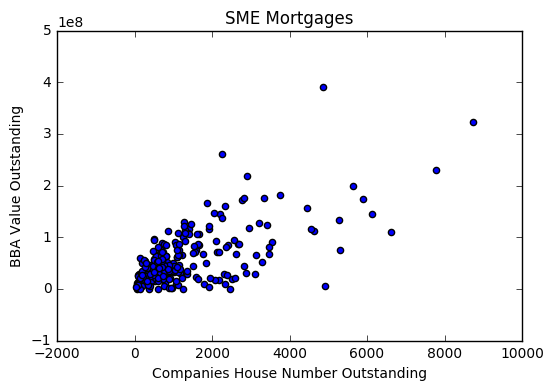

In [52]:
plt.scatter(ch_bba['mor_num_outstanding'], ch_bba['Q2 2016'])
plt.title('SME Mortgages')
plt.xlabel('Companies House Number Outstanding')
plt.ylabel('BBA Value Outstanding')

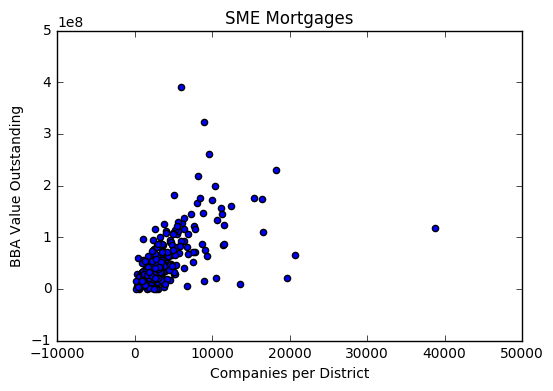

In [53]:
plt.scatter(ch_bba['num'], ch_bba['Q2 2016'])
plt.title('SME Mortgages')
plt.xlabel('Companies per District')
plt.ylabel('BBA Value Outstanding')

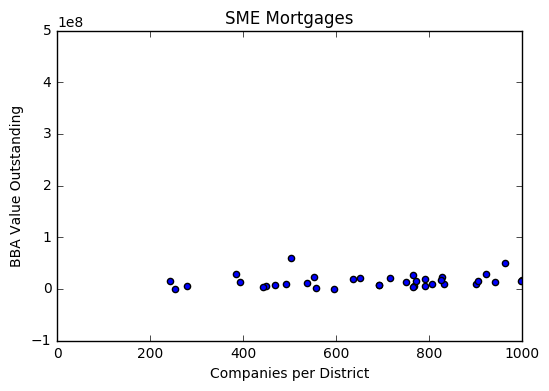

In [54]:
plt.scatter(ch_bba['num'], ch_bba['Q2 2016'])
plt.xlim([0,1000])
plt.title('SME Mortgages')
plt.xlabel('Companies per District')
plt.ylabel('BBA Value Outstanding')

As can be seen, most districts have significantly more than 1000 companies in various states of existence, and none less than 200. Also interesting is that the number of companies per district does not correlate too well with the outstanding value and similarly the outstanding value does not even correlate too well with the number of outstanding mortgages.

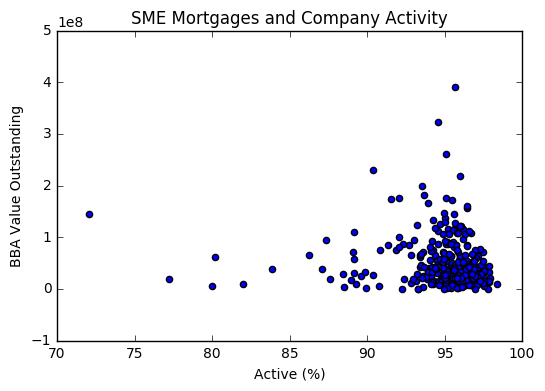

In [55]:
plt.scatter(ch_bba['active']/ch_bba['num']*100, ch_bba['Q2 2016'])
plt.title('SME Mortgages and Company Activity')
plt.xlabel('Active (%)')
plt.ylabel('BBA Value Outstanding')

Finally, areas with the highest levels of outstanding mortgages also tend to be those with high levels of company activity. 

# Some more interesting indices

A more interesting index can incorporate some more information about the area, such as the outstanding mortgages per number of companies or the number of outstanding mortgages, giving an average mortgage size per company in the district 

In [56]:
ix_max = data/np.max(data,axis=0)

In [57]:
ix_zscore = (data - data.mean(axis=0))/data.std(axis=0)

In [58]:
ix_2Q2016_per_company = ch_bba['Q2 2016']/ch_bba['num']

In [59]:
ix_2Q2016_per_mortgage = ch_bba['Q2 2016']/ch_bba['mor_num_outstanding']

In [60]:
ix_2Q2016_per_company_norm = ix_2Q2016_per_company/np.max(ix_2Q2016_per_company)

In [61]:
ix_2Q2016_per_mortgage_norm = ix_2Q2016_per_mortgage/np.max(ix_2Q2016_per_mortgage)

## Making a Map

Got some postcode location data from: 

https://data.london.gov.uk/dataset/postcode-directory-for-london


In [62]:
mapdata = pd.read_csv('/home/alessandro/Documents/placemake/London_postcode-ONS-postcode-Directory-May15.csv')

In [63]:
mapdata.head()

,pcd,pcd2,pcds,dointr,doterm,oscty,oslaua,osward,usertype,oseast1m,...,msoa11,parish,wz11,ccg,bua11,buasd11,ru11ind,oac11,lat,long
0,BR1 1AA,BR1 1AA,BR1 1AA,199002,200812,E99999999,E09000006,E05000109,1,540260,...,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
1,BR1 1AB,BR1 1AB,BR1 1AB,201203,,E99999999,E09000006,E05000109,0,540260,...,E02000134,E43000196,E33029192,E38000023,E34004707,E35000434,,2D1,51.406271,0.015177
2,BR1 1AD,BR1 1AD,BR1 1AD,201409,,E99999999,E09000006,E05000109,1,540383,...,E02000144,E43000196,E33029199,E38000023,E34004707,E35000434,,4C3,51.400040,0.016671
3,BR1 1AE,BR1 1AE,BR1 1AE,200808,,E99999999,E09000006,E05000109,0,540194,...,E02000144,E43000196,E33029200,E38000023,E34004707,E35000434,,2D1,51.404517,0.014151
4,BR1 1AX,BR1 1AX,BR1 1AX,200106,200610,E99999999,E09000006,E05000109,1,540421,...,E02000134,E43000196,E33029181,E38000023,E34004707,E35000434,,2D1,51.408226,0.017578


To be honest at the moment we're only really interested in the postcode and Lat-Lon, so:

In [64]:
mapdf = mapdata[['pcd', 'lat', 'long']]
del mapdata

In [65]:
mapdf.head()

,pcd,lat,long
0,BR1 1AA,51.406271,0.015177
1,BR1 1AB,51.406271,0.015177
2,BR1 1AD,51.400040,0.016671
3,BR1 1AE,51.404517,0.014151
4,BR1 1AX,51.408226,0.017578


In [66]:
mapdf['district'] = mapdf.pcd.str[:-4]

In [67]:
mapdf.head()

,pcd,lat,long,district
0,BR1 1AA,51.406271,0.015177,BR1
1,BR1 1AB,51.406271,0.015177,BR1
2,BR1 1AD,51.400040,0.016671,BR1
3,BR1 1AE,51.404517,0.014151,BR1
4,BR1 1AX,51.408226,0.017578,BR1


In [68]:
centroid = mapdf[['lat','long']].groupby(mapdf['district']).mean()

In [69]:
len(mapdf.district.unique())

215

In [70]:
len(ix_max)

332

There's a slight discrepancy between the two postcode lengths - I'm tempted to take the Office of National Statistic's view on what constitutes London postcodes and what doesn't, so let's add the data we have onto the centroid data via intersection.

In [71]:
ch_bba_map = centroid.join(ch_bba, how='inner')

In [72]:
ch_bba_map.columns

Index([u'lat', u'long', u'num', u'active', u'mor_num_charges',
       u'mor_num_outstanding', u'mor_part_sat', u'mor_sat', u'Q2 2013',
       u'Q3 2013', u'Q4 2013', u'Q1 2014', u'Q2 2014', u'Q3 2014', u'Q4 2014',
       u'Q1 2015', u'Q2 2015', u'Q3 2015', u'Q4 2015', u'Q1 2016', u'Q2 2016'],
      dtype='object')

In [73]:
ch_bba_map.tail()

,lat,long,num,active,mor_num_charges,mor_num_outstanding,mor_part_sat,mor_sat,Q2 2013,Q3 2013,...,Q1 2014,Q2 2014,Q3 2014,Q4 2014,Q1 2015,Q2 2015,Q3 2015,Q4 2015,Q1 2016,Q2 2016
W1T,51.520119,-0.136462,9146,8870,10491,5292,6,5187,92144745.0,90781037.0,...,91665290.0,94436764.0,93062675.0,94691760.0,86470878.0,67174582.0,78820474.0,76573580.0,78511415.0,74654082.0
W1U,51.518573,-0.153500,11294,8142,11764,6138,12,5608,171777372.0,167730027.0,...,162314148.0,164009436.0,157134997.0,69906773.0,152244234.0,72522996.0,116942244.0,110634324.0,135821128.0,145034036.0
W1W,51.519120,-0.141004,6952,6728,6099,3462,1,2633,33716125.0,24057738.0,...,24923291.0,41893050.0,30781984.0,27707490.0,40963363.0,46986733.0,49622735.0,52444957.0,68051938.0,68116349.0
WD3,51.625275,-0.492763,4959,4726,2732,1606,2,1124,102970525.0,105592020.0,...,111943787.0,107898445.0,109810337.0,97371605.0,110279406.0,110651229.0,106744380.0,112417300.0,104820610.0,105216219.0
WD6,51.642790,-0.256291,6767,6232,4584,2350,2,2232,69362416.0,64170156.0,...,65998554.0,74805495.0,69489766.0,47004678.0,71961640.0,74029325.0,59576774.0,54249560.0,67334567.0,80921417.0


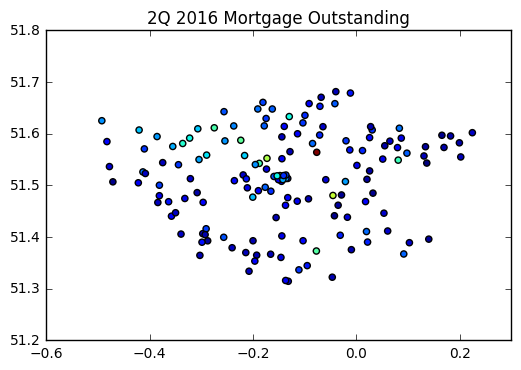

In [74]:
plt.scatter(ch_bba_map.long, ch_bba_map.lat, cmap='jet', c=ch_bba_map['Q2 2016'])
plt.title('2Q 2016 Mortgage Outstanding')

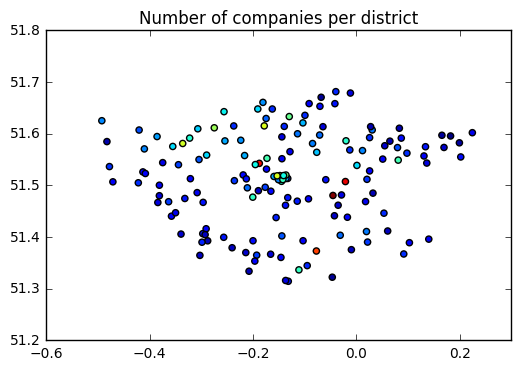

In [75]:
plt.scatter(ch_bba_map.long, ch_bba_map.lat, cmap='jet', c=ch_bba_map['num'])
plt.title('Number of companies per district')

In [76]:
ix_2Q2016_per_company = pd.DataFrame(data=ch_bba_map['Q2 2016']/ch_bba_map['num'], columns=['index'])
ix_2Q2016_per_company['index'] = ix_2Q2016_per_company['index']/max(ix_2Q2016_per_company['index'])

In [77]:
ix_2Q2016_per_company['lat'] = ch_bba_map['lat']

In [78]:
ix_2Q2016_per_company['long'] = ch_bba_map['long']

In [79]:
ix_2Q2016_per_company.to_csv('/home/alessandro/Documents/placemake/norm_index.csv')

Then we import this into Google Maps to demo, and can add layers depending on the index of interest.

https://www.google.com/maps/d/u/0/edit?mid=1TjAnbGpEY1kBMQV-lYeJOl6bnqk&ll=51.40042278068232%2C0.003298661246390111&z=10